In [1]:
from ITMO.knn.main import *

In [2]:
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [35]:
from ITMO.util import read_csv
table = read_csv('ITMO/knn/dataset.txt', '\t')
all_samples = make_dataset(table)

In [36]:
def weighted_mean(samples, n_classes):
    

In [37]:
import copy


0.054778908474576275
0.18310155932203387


<IPython.core.display.Javascript object>


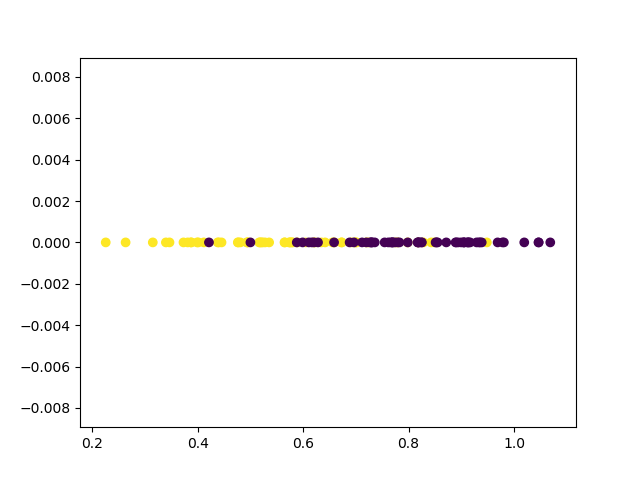

In [54]:
polar_samples = []
polar_samples = copy.deepcopy(all_samples)
x_mean = 0
y_mean = 0
x_mean = np.mean([polar_samples[i].coords[0] for i in range(len(polar_samples))])
y_mean = np.mean([polar_samples[i].coords[1] for i in range(len(polar_samples))])
print(x_mean)
print(y_mean)
for sample in polar_samples:
    sample.coords[0] = sample.coords[0] - x_mean
    sample.coords[1] = sample.coords[1] - y_mean
    sample.coords[0] = np.sqrt(pow(sample.coords[0],2)+pow(sample.coords[1],2))
    sample.coords[1] = 0
plt.scatter([sample.coords[0] for sample in polar_samples], [sample.coords[1] for sample in polar_samples], c=[sample.label for sample in polar_samples])
plt.show()

In [69]:
def count_parabolic(t=1,u=1, power=2):
    parabolic_samples = []
    parabolic_samples = copy.deepcopy(all_samples)
    x_mean = 0
    y_mean = 0
    x_mean = np.mean([parabolic_samples[i].coords[0] for i in range(len(parabolic_samples))])
    y_mean = np.mean([parabolic_samples[i].coords[1] for i in range(len(parabolic_samples))])
#     print(x_mean)
#     print(y_mean)

    for sample in parabolic_samples:
        sample.coords[0] = sample.coords[0] - x_mean
        sample.coords[1] = sample.coords[1] - y_mean
        sample.coords.append(t*pow(sample.coords[0],power)+u*pow(sample.coords[1],power))
    return (parabolic_samples)


<IPython.core.display.Javascript object>


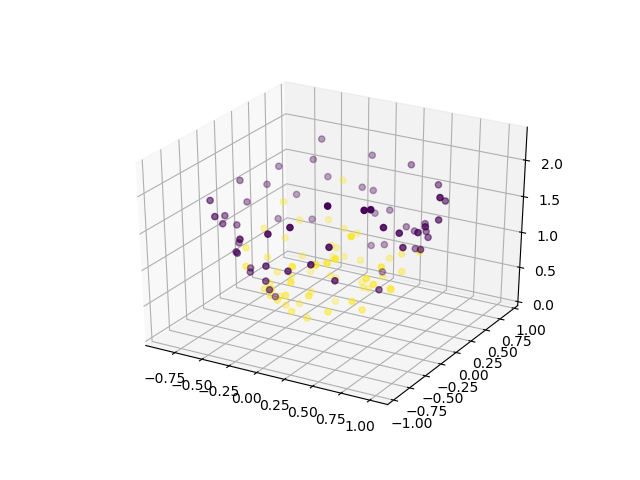

In [98]:
parabolic_samples = count_parabolic(t=2,u=2,power=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([sample.coords[0] for sample in parabolic_samples], [sample.coords[1] for sample in parabolic_samples],
           [sample.coords[2] for sample in parabolic_samples], c=[sample.label for sample in parabolic_samples])    

In [121]:
def count_bicentral(samples, bic_a, mean=False):
    coords = []
    bicentral_samples = []
    means = [0 for b in samples[0].coords]
    if mean:
        for idx in range(len(means)):
            means[idx] = np.mean([samples[i].coords[idx] for i in range(len(samples))])
            for sample in samples:
                sample.coords[idx] -= means[idx]
    for sample in samples:
        bicentral_samples.append(Point(sample.label,[np.sqrt(sum([pow(coord - bic_a,2) for coord in sample.coords])), 
                                                   np.sqrt(sum([pow(coord + bic_a,2) for coord in sample.coords]))]))
    return bicentral_samples
    

<IPython.core.display.Javascript object>


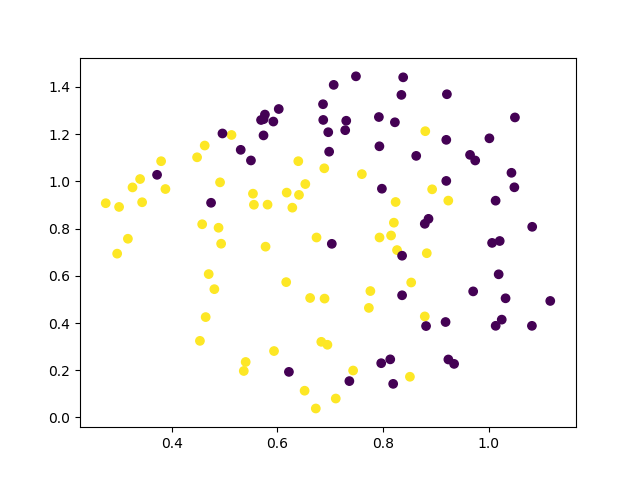

In [130]:
bic_samples = copy.deepcopy(all_samples)

bicentral_samples = count_bicentral(bic_samples, 0.25, mean = False)
plt.scatter([sample.coords[0] for sample in bicentral_samples], [sample.coords[1] for sample in bicentral_samples], c=[sample.label for sample in bicentral_samples])
plt.show()

In [131]:
DISTANCE_METRIC = distances.euclidean
for N_NEIGHBORS in range(5,16):
    classifier = WeightedKNNClassifier(N_NEIGHBORS, DISTANCE_METRIC, KERNEL)
    misses = []
    misses.append(leave_one_out_validation(all_samples, classifier, 2))
    misses.append(leave_one_out_validation(polar_samples, classifier, 2))
    misses.append(leave_one_out_validation(parabolic_samples, classifier, 2))
    misses.append(leave_one_out_validation(bicentral_samples, classifier, 2))
    print('{0}:{1}'.format(N_NEIGHBORS, misses))

5:[29, 24, 28, 25]
6:[31, 23, 25, 25]
7:[32, 23, 24, 22]
8:[29, 25, 26, 21]
9:[30, 24, 24, 20]
10:[35, 24, 25, 21]
11:[31, 25, 24, 20]
12:[37, 25, 26, 23]
13:[30, 23, 25, 21]
14:[35, 24, 26, 21]
15:[30, 24, 24, 21]


[28, 24, 27]
